In [60]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(31167, 2)

In [62]:
df.head()

,Time,domain
0,2020-10-15 15:39:14,www.google.com
1,2020-10-15 15:39:17,mymc.glb.montgomerycollege.edu
2,2020-10-15 15:39:17,mymclogin.glb.montgomerycollege.edu
3,2020-10-15 15:39:17,mymclogin.glb.montgomerycollege.edu
4,2020-10-15 15:39:43,mymc.glb.montgomerycollege.edu


In [63]:
df.tail()

,Time,domain
31162,2021-02-20 11:24:57,github.com
31163,2021-02-20 11:25:03,github.com
31164,2021-02-20 11:25:17,localhost:8888
31165,2021-02-20 11:25:45,localhost:8888
31166,2021-02-20 11:25:49,localhost:8888


In [64]:
df.dtypes

Time      object
domain    object
dtype: object

In [19]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

77

In [65]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [66]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

#df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [67]:
df['domain'].value_counts()[:50]

bb-montgomerycollege.blackboard.com    4849
outlook.office.com                     3416
mail.yahoo.com                         3128
drive.google.com                       1708
www.google.com                         1565
mail.google.com                        1451
docs.google.com                        1274
montgomerycollege.zoom.us              1164
umd.instructure.com                     984
www.mathxl.com                          868
github.com                              817
mymclogin.glb.montgomerycollege.edu     424
piazza.com                              367
mymc.glb.montgomerycollege.edu          327
calendar.google.com                     304
mcssb.glb.montgomerycollege.edu         259
www.coursera.org                        241
md-mcps-psv.edupoint.com                231
blackboard.umbc.edu                     230
montgomerycollege.mywconline.com        212
teams.microsoft.com                     189
smile.amazon.com                        187
www-awn.aleks.com               

<AxesSubplot:>

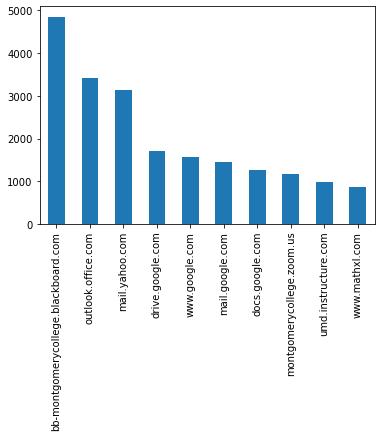

In [68]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [69]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0.0        4
1.0        4
2.0        4
3.0        1
4.0        1
5.0       28
6.0      101
7.0      381
8.0      713
9.0     1460
10.0    2359
11.0    2762
12.0    3130
13.0    3396
14.0    3136
15.0    2746
16.0    2687
17.0    2470
18.0    1667
19.0    1097
20.0    1269
21.0    1022
22.0     456
23.0     193
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

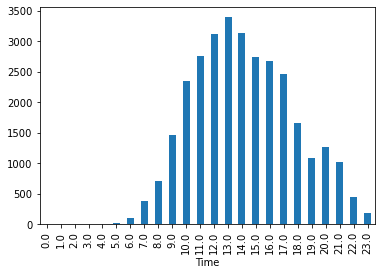

In [70]:
hourly_counts.plot.bar()

In [71]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2020-10-15 15:39:14,www.google.com,Thursday,3.0
1,2020-10-15 15:39:17,mymc.glb.montgomerycollege.edu,Thursday,3.0
2,2020-10-15 15:39:17,mymclogin.glb.montgomerycollege.edu,Thursday,3.0
3,2020-10-15 15:39:17,mymclogin.glb.montgomerycollege.edu,Thursday,3.0
4,2020-10-15 15:39:43,mymc.glb.montgomerycollege.edu,Thursday,3.0


In [37]:
df['Day'].value_counts()

Monday       6707
Wednesday    5860
Thursday     5430
Friday       5419
Tuesday      4700
Sunday       1520
Saturday     1451
Name: Day, dtype: int64

In [38]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0.0    6707
1.0    4700
2.0    5860
3.0    5430
4.0    5419
5.0    1451
6.0    1520
Name: DayIndex, dtype: int64

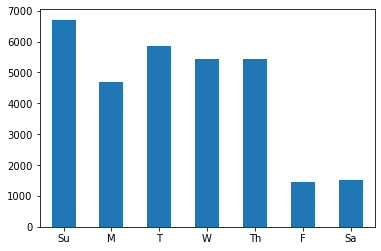

In [39]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['Su','M', 'T', 'W','Th', 'F', 'Sa'], rotation=0)

plt.show()

In [40]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2020-10-15 15:39:14,www.google.com,Thursday,3.0,False
1,2020-10-15 15:39:17,mymc.glb.montgomerycollege.edu,Thursday,3.0,False
2,2020-10-15 15:39:17,mymclogin.glb.montgomerycollege.edu,Thursday,3.0,False
3,2020-10-15 15:39:17,mymclogin.glb.montgomerycollege.edu,Thursday,3.0,False
4,2020-10-15 15:39:43,mymc.glb.montgomerycollege.edu,Thursday,3.0,False


In [41]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [43]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
1876,2020-10-24 10:23:02,www.office.com,Saturday,5.0,True
1877,2020-10-24 10:32:51,www.google.com,Saturday,5.0,True
1878,2020-10-24 10:51:13,www.latlong.net,Saturday,5.0,True
1879,2020-10-24 10:57:26,www.google.com,Saturday,5.0,True
1880,2020-10-24 10:57:39,www.rapidtables.com,Saturday,5.0,True


In [44]:
weekday['domain'].value_counts()[:5]

bb-montgomerycollege.blackboard.com    4627
outlook.office.com                     3249
mail.yahoo.com                         2918
drive.google.com                       1683
www.google.com                         1327
Name: domain, dtype: int64

In [45]:
weekend['domain'].value_counts()[:5]

www.google.com                         238
bb-montgomerycollege.blackboard.com    222
mail.yahoo.com                         210
github.com                             201
mail.google.com                        194
Name: domain, dtype: int64

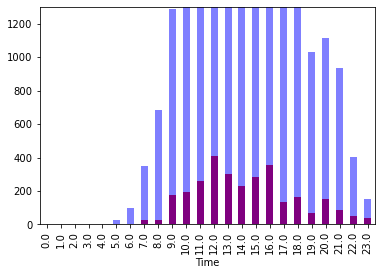

In [46]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [47]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

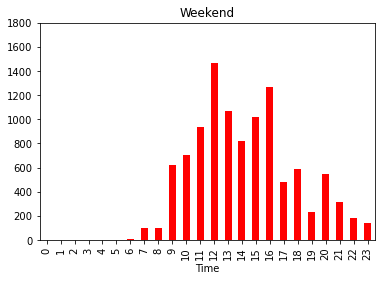

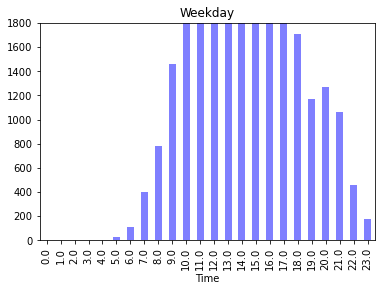

In [48]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [49]:
df['domain'].value_counts()[:50]

bb-montgomerycollege.blackboard.com    4849
outlook.office.com                     3416
mail.yahoo.com                         3128
drive.google.com                       1708
www.google.com                         1565
mail.google.com                        1451
docs.google.com                        1274
montgomerycollege.zoom.us              1164
umd.instructure.com                     984
www.mathxl.com                          868
github.com                              817
mymclogin.glb.montgomerycollege.edu     424
piazza.com                              367
mymc.glb.montgomerycollege.edu          327
calendar.google.com                     304
mcssb.glb.montgomerycollege.edu         259
www.coursera.org                        241
md-mcps-psv.edupoint.com                231
blackboard.umbc.edu                     230
montgomerycollege.mywconline.com        212
teams.microsoft.com                     189
smile.amazon.com                        187
www-awn.aleks.com               

In [50]:
df['domain'] = df['domain'].astype(str)

In [51]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

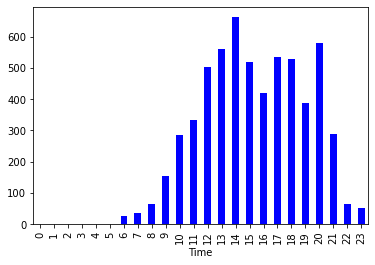

In [52]:
_= show_domain_stats('google', 'blue')

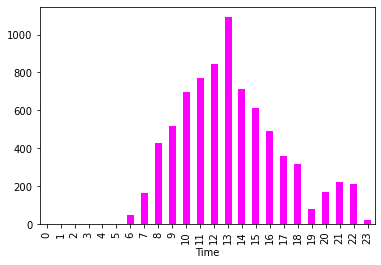

In [53]:
_ = show_domain_stats('montgomerycollege', 'magenta')


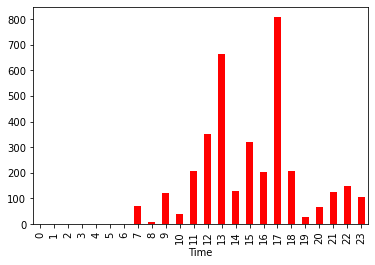

In [59]:
_ = show_domain_stats('github', 'red')


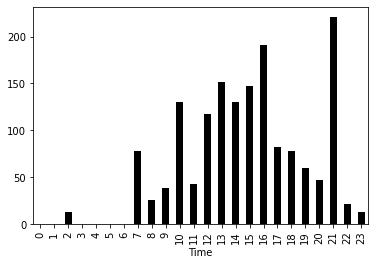

In [57]:
_=show_domain_stats('piazza', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 


The use of the computer goes back  only to October 2020 - The data is thus skewed by the period of anaylis when a personal computer is being used also for professional purposes 


The computer seems to be used both during the weekend and during the week approximately in the same manner - meaning during the same hours. 

The person using it seems to be employed and  using it mostly as a tool to perform her job (teaching/going to school).

The person using it seems to be tired by the end of the week and in fact seems to take a break from the pc  primarily on Fridays and Saturdays. 

Evening hours are relatively speaking lighter in terms of usage as well. 

The  bulk of the time is  focused on school-tools such as Blackboard / google/  - some of this data repeats in my opnion (for example I think Blackboard for Montgomery College and MY MC  log in information could be aggregated and  if so, it might give a better picture, since the two sites must be visited one before the other to allow access for example. Also, I  tend to leave my browser open with lots of windows open at the same time, I think that is reflected by the  distributions' overlap with usage overall).

I find it interesting that  my regular visits to news website are not showing up (Although I do this a lot on my phone now that I think about it) 
Not a lot of scoail media - which is actually confirmed (I am surprised that Facebook actually made it in this list given the fact that I actively boycott it! 



### Do you give permission for another student to analyze your `history_cleaned.csv`? 

(Your name will stay confidencial)

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here

In [ ]:
I find the idea of analyzing browsing data to discover characteristics of an individual quite interesting. 

It is scary to think of how much information is available  about us that we might not want people 
to have access to.

I wish more people took tha time to understand that this is the case, especially younger people, who
end up being haunted by silly decisions they might make when they are younger. 